In [1]:
import matplotlib.pyplot as plt
import numpy as np

from groupBMC import GroupBMC

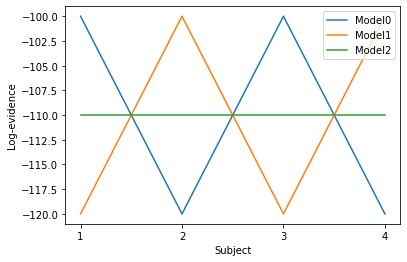

In [2]:
L = np.array([[-100, -120, -100, -120], [-120, -100, -120, -100], [-110, -110, -110, -110]])
# plot the log-evidence
_, ax = plt.subplots()
for i in range(len(L)):
    ax.plot(L[i], label=f'Model{i}')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([1, 2, 3, 4])
ax.set_xlabel('Subject')
ax.set_ylabel('Log-evidence')
ax.legend()
plt.show()

In [3]:
result = GroupBMC(L).get_result()

In [4]:
print('       ' + ' '.join([f'subj{j+1}' for j in range(L.shape[1])]))
for i in range(L.shape[0]):
    print(f'model{i+1} ' + ' '.join(map(lambda f: f'{f:.3f}', result.attribution[i])))

       subj1 subj2 subj3 subj4
model1 1.000 0.000 1.000 0.000
model2 0.000 1.000 0.000 1.000
model3 0.000 0.000 0.000 0.000


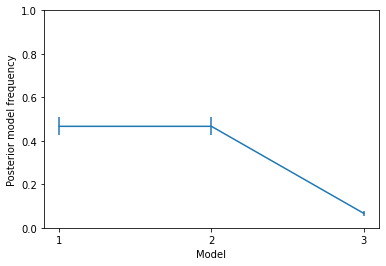

In [5]:
_, ax = plt.subplots()
ax.errorbar(np.arange(len(L)), result.frequency_mean, result.frequency_var)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([1, 2, 3])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()

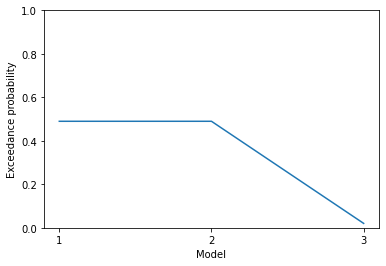

In [6]:
_, ax = plt.subplots()
ax.plot(np.arange(len(L)), result.exceedance_probability)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([1, 2, 3])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Exceedance probability')
plt.show()

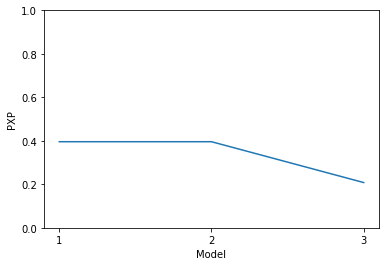

In [7]:
_, ax = plt.subplots()
ax.plot(np.arange(len(L)), result.protected_exceedance_probability)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([1, 2, 3])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('PXP')
plt.show()

In [8]:
partitions = [[1, 2], [3]]
result = GroupBMC(L, partitions=partitions).get_result()

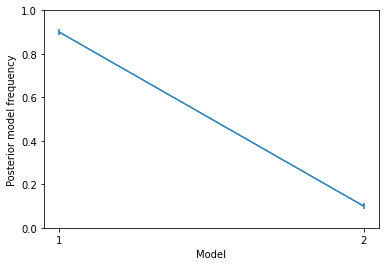

In [9]:
_, ax = plt.subplots()
ax.errorbar(np.arange(len(partitions)), result.frequency_mean, result.frequency_var)
ax.set_xticks([0, 1])
ax.set_xticklabels([1, 2])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()